In [66]:
import auxiliary
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
import numpy as np
import simple_angles_dataset_generator as simple_angles_gen
from mcu_chamfer import MCUChamferModel
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots

In [140]:
figure_num = 16**2
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 2
noise_level = 0
lw = np.array([10, -75])
up = np.array([170, 75])
param_names = np.array(["inside_angle", "rotation_angle_x"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, simple_angles_gen.generate_angles_points,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt)
mcu_model = MCUChamferModel(k=5, c=0.1, figures=figures, params=control_vars, params_names=param_names)


In [141]:
mcu_model.train(max_iters=100)
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")

/Users/Ekaterina.Inkina/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


rre_median_embedding_vs_params: 0.0018507176273940859


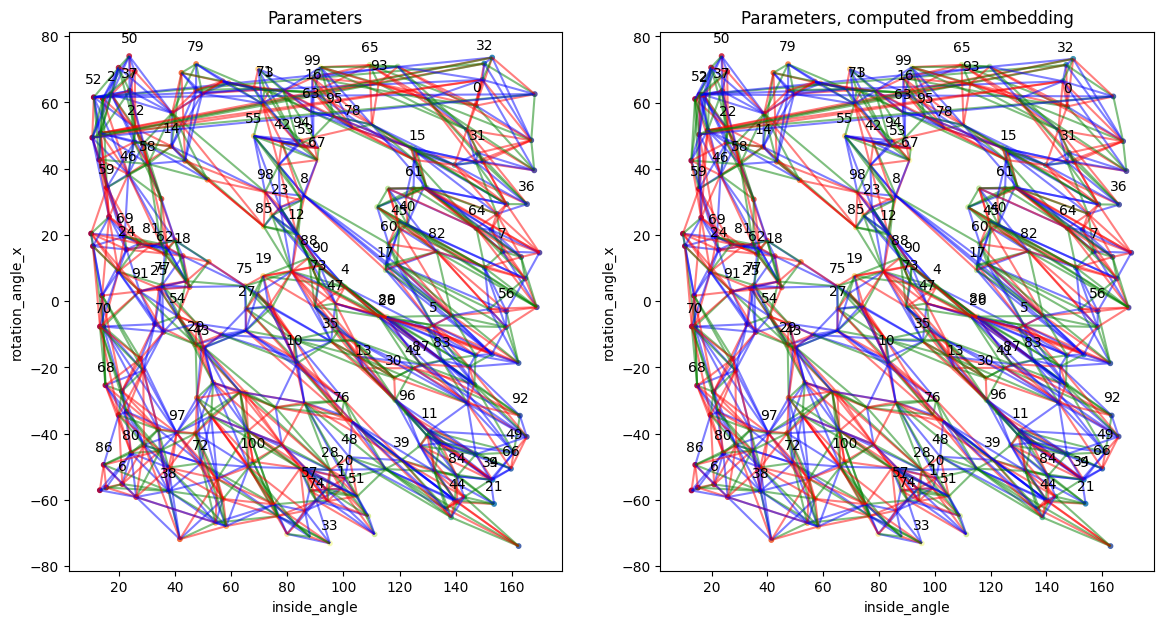

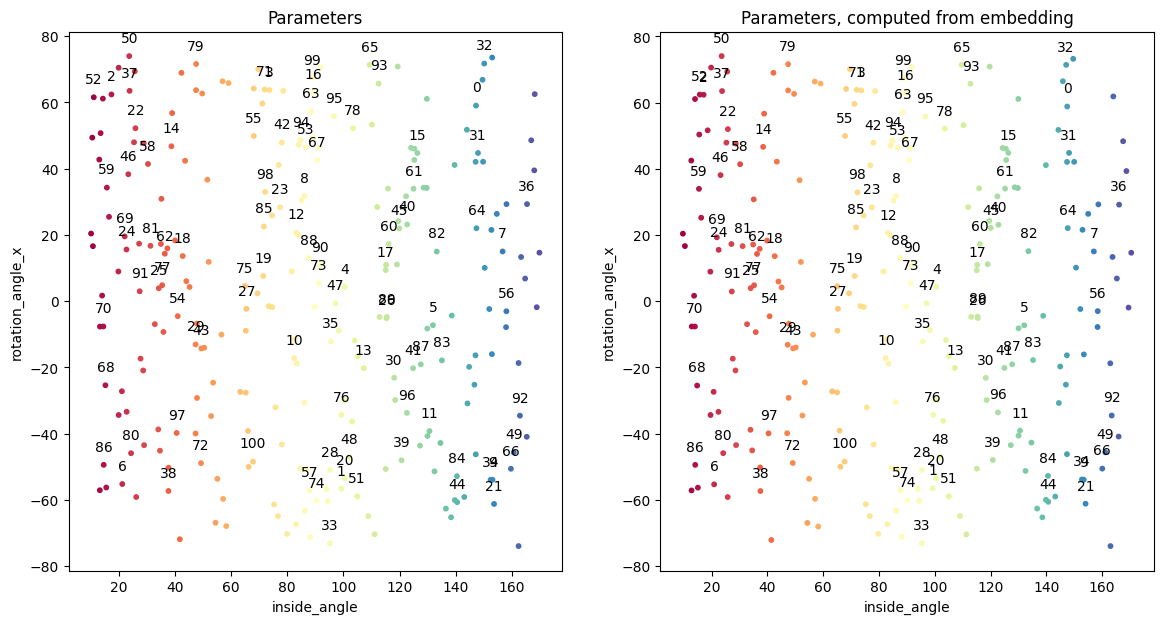

In [142]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=True)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=True)

In [145]:
mcu_experiments = MCUexperiments(mcu_model)
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, simple_angles_gen.generate_angles_points, figure_point_cnt = 200, noise_level = 0, pieces_cnt=10, test_data_size=20, same_value=False)

Finding neighbors: 132 ms , optimization: 1 ms
-----------
x_opt  = [ 20.26724569 -61.46324712], x_err = 0.0003413393273106385
x_real = [ 24.35283873 -64.65997756]
Finding neighbors: 132 ms , optimization: 0 ms
-----------
x_opt  = [ 74.54542105 -51.84998425], x_err = 0.4985389704381732
x_real = [ 10.00126037 -66.51617107]
Finding neighbors: 128 ms , optimization: 0 ms
-----------
x_opt  = [ 50.04295353 -53.81110747], x_err = 0.3245602188951048
x_real = [ 13.51006469 -64.36721951]
Finding neighbors: 135 ms , optimization: 0 ms
-----------
x_opt  = [ 95.79899938 -27.83723869], x_err = 0.7515003393931838
x_real = [ 12.89329028 -74.96603156]
Finding neighbors: 128 ms , optimization: 2 ms
-----------
x_opt  = [ 14.36575187 -60.3523136 ], x_err = 9.897387271804918e-05
x_real = [ 15.33229287 -61.28877978]
Finding neighbors: 128 ms , optimization: 0 ms
-----------
x_opt  = [ 74.03840939 -51.87546624], x_err = 0.5128383896711953
x_real = [ 10.09712517 -64.18650059]
Finding neighbors: 126 ms , 

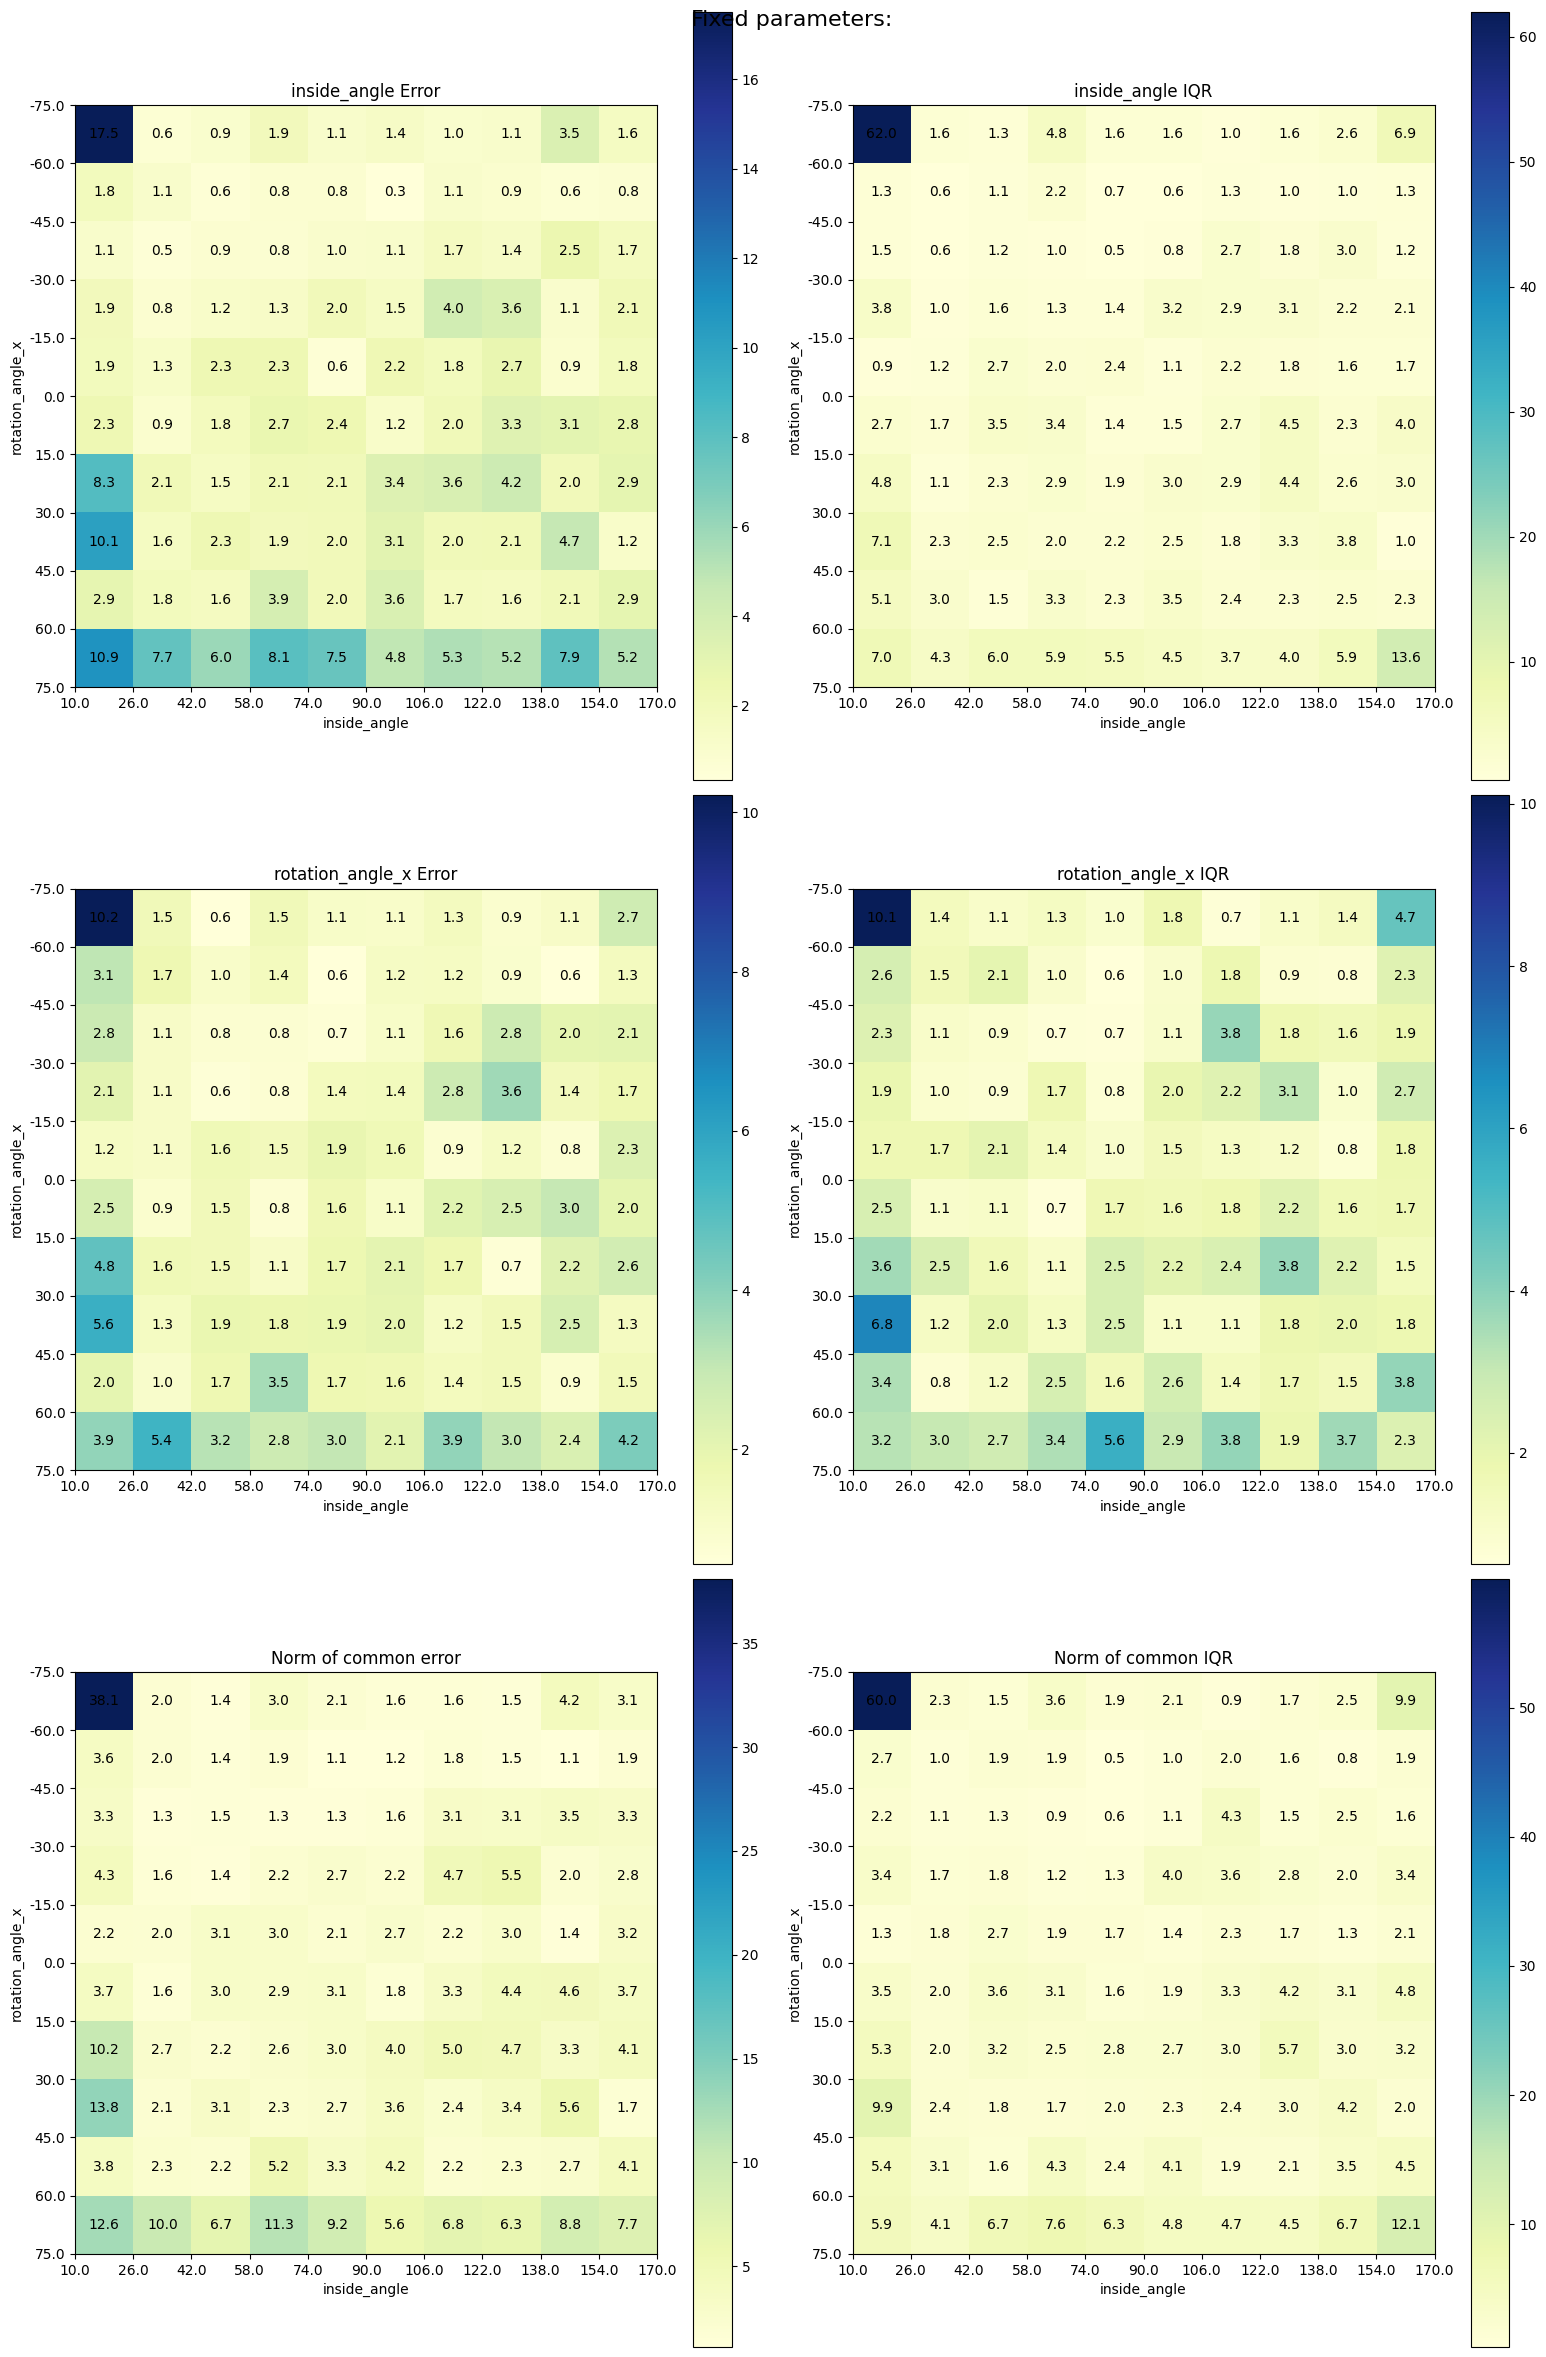

In [147]:
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, filename="images/ch_angle_2d.png")

28.537808058369038 121.20450821198536 -1.4578264571821222 44.454005725279146


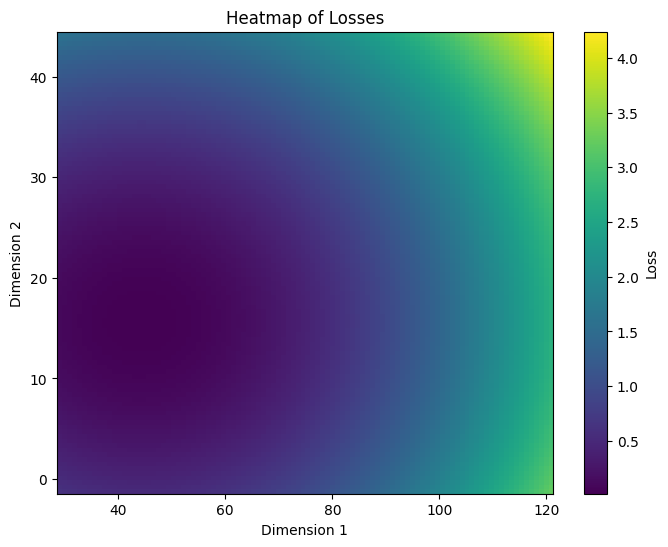

Finding neighbors: 885 ms , optimization: 167 ms
x_opt = [43.78595537 15.57136088], x_err = 0.01698502067082139
x_real = [45 15]
28.537808058369038 121.20450821198536 -1.4578264571821222 44.454005725279146


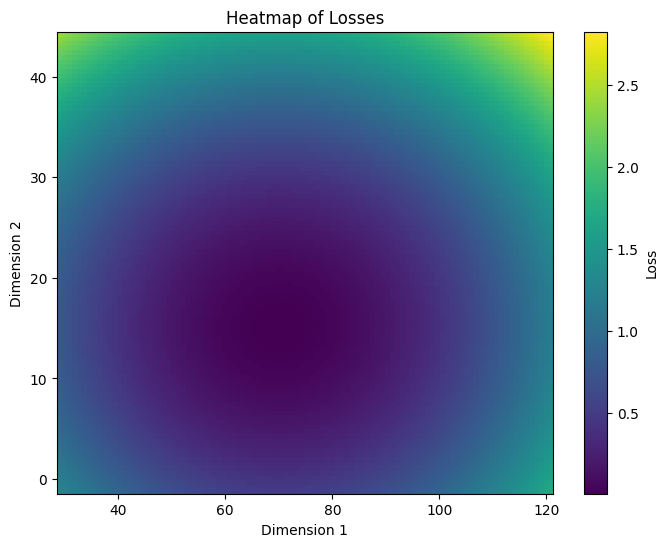

Finding neighbors: 707 ms , optimization: 162 ms
x_opt = [69.93192519 15.09417158], x_err = 0.004844861128824083
x_real = [70 15]


In [81]:
test_control_vars = np.array([[45, 15], [70, 15]])
test_control_vars_dict = dataset_generator.put_control_vars_in_dict(test_control_vars, p,
                                                                    mcu_model.params_names)
test_figures = dataset_generator.generate_array_of_figures(test_control_vars_dict, simple_angles_gen.generate_angles_points,
                                                           noise_level=noise_level,
                                                           min_num_points=1000)
x_opts = []
for (figure, control_var) in zip(test_figures, test_control_vars):
    x_opt, x_err = mcu_model.predict(figure, gd = False, plot_loss=True)
    print(f"x_opt = {x_opt}, x_err = {x_err}" )
    print(f"x_real = {control_var}")